In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")


data = pd.read_csv("/content/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0.00
1,0,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0.00
2,1,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0.00
3,1,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0.00
4,2,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0.00


In [ ]:
pd.set_option("display.float", "{:.2f}".format)

data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,14008.00,14008.00,14008.00,14008.00,14008.00,14008.00,14008.00,14008.00,14008.00,14008.00,...,14007.00,14007.00,14007.00,14007.00,14007.00,14007.00,14007.00,14007.00,14007.00,14007.00
mean,10177.88,-0.24,0.28,0.85,0.30,-0.12,0.13,-0.16,-0.02,0.99,...,-0.07,-0.16,-0.04,0.01,0.12,0.04,0.01,0.00,63.93,0.00
std,7778.31,1.72,1.39,1.56,1.50,1.29,1.32,1.24,1.26,1.21,...,0.87,0.62,0.50,0.59,0.43,0.56,0.40,0.26,177.89,0.06
min,0.00,-27.67,-34.61,-24.67,-4.66,-32.09,-23.50,-26.55,-23.63,-7.18,...,-11.47,-8.59,-19.25,-2.51,-4.78,-1.34,-7.98,-3.58,0.00,0.00
25%,2993.00,-0.97,-0.28,0.41,-0.62,-0.72,-0.62,-0.62,-0.18,0.29,...,-0.27,-0.55,-0.17,-0.34,-0.14,-0.37,-0.08,-0.01,5.49,0.00
50%,9168.00,-0.32,0.25,0.96,0.22,-0.19,-0.15,-0.11,0.02,0.97,...,-0.13,-0.12,-0.05,0.06,0.16,-0.04,-0.00,0.02,15.70,0.00
75%,17252.50,1.16,0.88,1.61,1.20,0.35,0.51,0.42,0.27,1.65,...,0.02,0.23,0.07,0.39,0.39,0.37,0.10,0.07,52.16,0.00
max,24907.00,1.96,10.56,4.10,11.93,34.10,21.39,34.30,10.54,10.39,...,22.61,4.53,13.88,3.20,5.53,3.52,8.25,4.86,7712.43,1.00


In [ ]:
data.isnull().sum().sum()

20

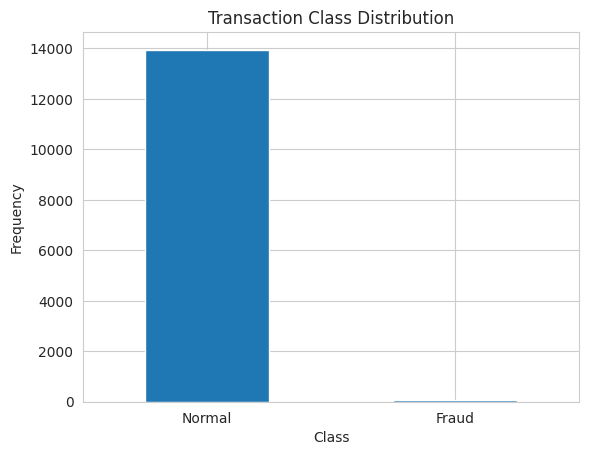

In [ ]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [ ]:
data.Class.value_counts()

0.00    13951
1.00       56
Name: Class, dtype: int64

In [ ]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (56, 31)
Shape of Non-Fraudulant transactions: (13951, 31)


In [ ]:
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,56.00,13951.00
mean,90.82,63.82
std,310.31,177.17
min,0.00,0.00
25%,1.00,5.67
50%,1.00,15.90
75%,1.02,52.39
max,1809.68,7712.43


In [ ]:
pd.concat([fraud.Time.describe(), normal.Time.describe()], axis=1)

,Time,Time
count,56.00,13951.00
mean,12262.11,10168.46
std,5411.80,7784.65
min,406.00,0.00
25%,8149.25,2985.00
50%,11380.00,9164.00
75%,17302.50,17249.00
max,21662.00,24903.00


<ipython-input-25-4ee4e6940931>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Time'], color='blue');
<ipython-input-25-4ee4e6940931>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Amount'],color='blue');


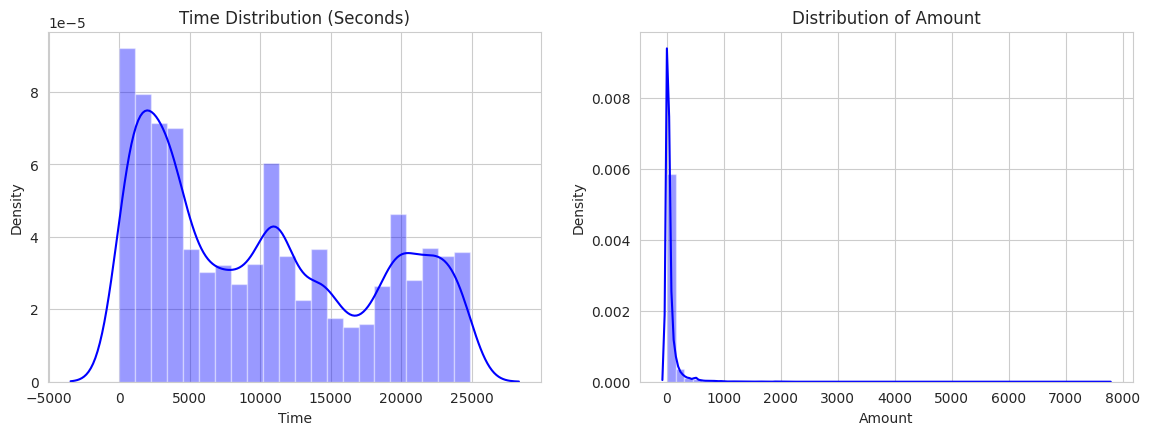

In [ ]:
# plot the time feature
plt.figure(figsize=(14,10))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')
sns.distplot(data['Time'], color='blue');

# plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.distplot(data['Amount'],color='blue');

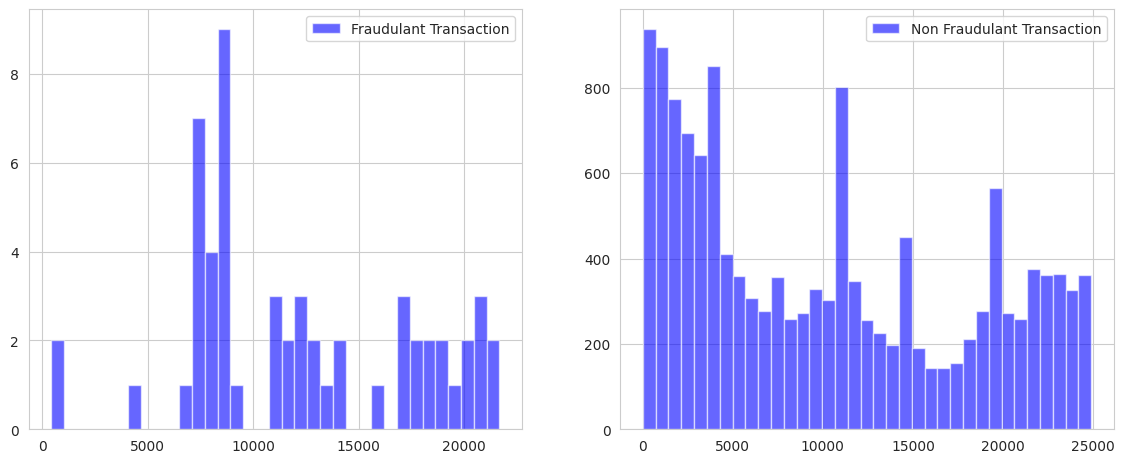

In [ ]:

# data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6)
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
data[data.Class == 1].Time.hist(
  bins=35, color='blue', alpha=0.6, label="Fraudulant Transaction"
)
plt.legend()

plt.subplot(2, 2, 2)
data[data.Class == 0].Time.hist(
  bins=35, color='blue', alpha=0.6, label="Non Fraudulant Transaction"
)
plt.legend()

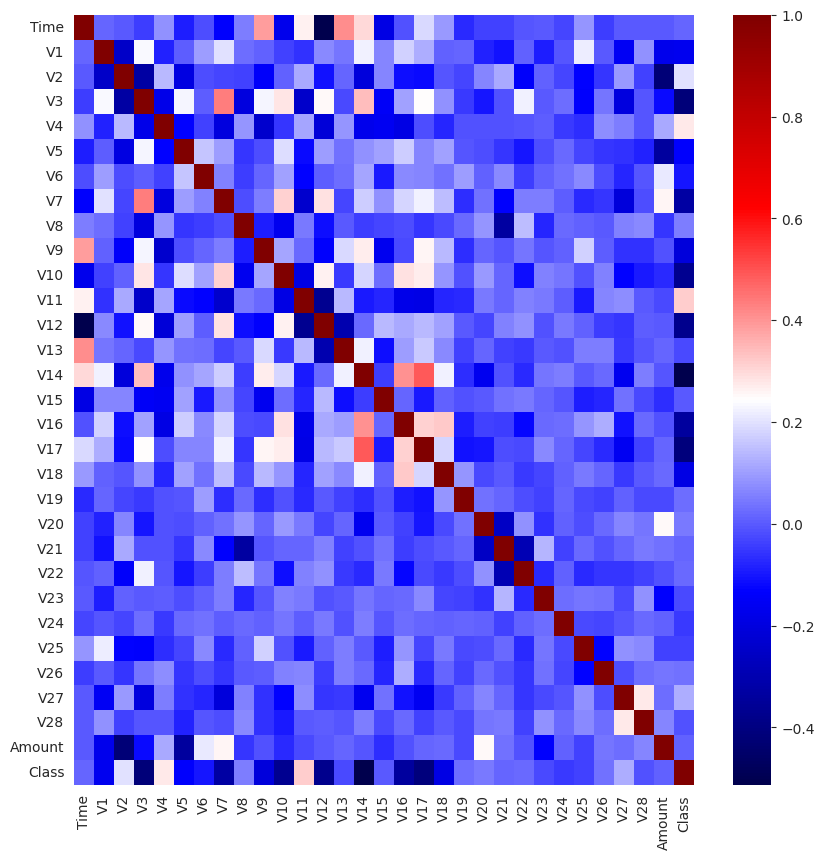

In [ ]:

# heatmap to find any high correlations

plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(), cmap="seismic")
plt.show();

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = data.drop('Class', axis=1)
y = data.Class

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y,
                                                    test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v,
                                                            test_size=0.2, random_state=42)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulant transaction weight: {w_n}")
print(f"Non-Fraudulant transaction weight: {w_p}")

Fraudulant transaction weight: 0.00407955124936257
Non-Fraudulant transaction weight: 0.9959204487506375


In [ ]:

print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (7844, 30), y_train: (7844,)
_______________________________________________________
VALIDATION: X_validate: (1961, 30), y_validate: (1961,)
__________________________________________________
TESTING: X_test: (4203, 30), y_test: (4203,)


In [ ]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")

In [ ]:

from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])
METRICS = [
#     keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=METRICS)

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]
class_weight = {0:w_p, 1:w_n}

r = model.fit(
    X_train, y_train,
    validation_data=(X_validate, y_validate),
    batch_size=2048,
    epochs=300,
#     class_weight=class_weight,
    callbacks=callbacks,
)
score = model.evaluate(X_test, y_test)
print(score)

Epoch 1/300
4/4 [==============================] - 4s 369ms/step - loss: 0.9101 - fn: 13.0000 - fp: 3603.0000 - tn: 4209.0000 - tp: 19.0000 - precision: 0.0052 - recall: 0.5938 - val_loss: 0.7544 - val_fn: 0.0000e+00 - val_fp: 1756.0000 - val_tn: 198.0000 - val_tp: 7.0000 - val_precision: 0.0040 - val_recall: 1.0000
Epoch 2/300
1/4 [======>.......................] - ETA: 0s - loss: 0.8929 - fn: 1.0000 - fp: 950.0000 - tn: 1089.0000 - tp: 8.0000 - precision: 0.0084 - recall: 0.8889

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 1s 154ms/step - loss: 0.8883 - fn: 8.0000 - fp: 3625.0000 - tn: 4187.0000 - tp: 24.0000 - precision: 0.0066 - recall: 0.7500 - val_loss: 0.7223 - val_fn: 1.0000 - val_fp: 1443.0000 - val_tn: 511.0000 - val_tp: 6.0000 - val_precision: 0.0041 - val_recall: 0.8571
Epoch 3/300
4/4 [==============================] - 1s 167ms/step - loss: 0.8634 - fn: 5.0000 - fp: 3630.0000 - tn: 4182.0000 - tp: 27.0000 - precision: 0.0074 - recall: 0.8438 - val_loss: 0.6980 - val_fn: 1.0000 - val_fp: 1016.0000 - val_tn: 938.0000 - val_tp: 6.0000 - val_precision: 0.0059 - val_recall: 0.8571
Epoch 4/300
4/4 [==============================] - 1s 162ms/step - loss: 0.8502 - fn: 5.0000 - fp: 3714.0000 - tn: 4098.0000 - tp: 27.0000 - precision: 0.0072 - recall: 0.8438 - val_loss: 0.6805 - val_fn: 1.0000 - val_fp: 645.0000 - val_tn: 1309.0000 - val_tp: 6.0000 - val_precision: 0.0092 - val_recall: 0.8571
Epoch 5/300
4/4 [==============================] - 0s 104ms/step - loss: 

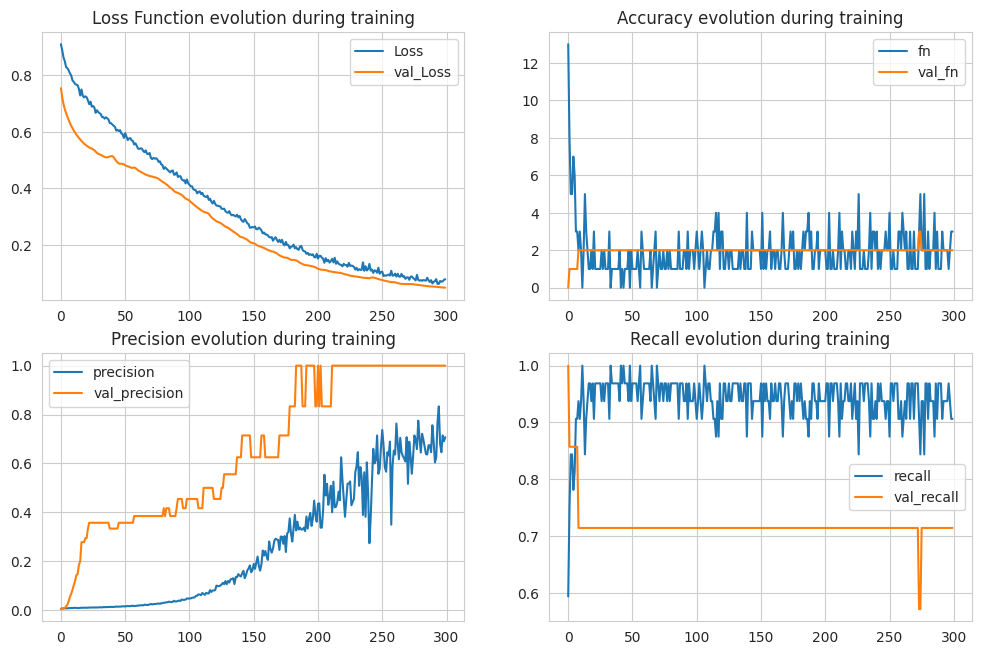

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['fn'], label='fn')
plt.plot(r.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()